# **Building of Regression Model with Random Forest Algorithum**
In the previous three sessions we have achieved much. We had prepared our target dataset and performed some exploratory analysis on real bioactivity data. Next, we calculated the fingerprints details for the compounds and now we are ready to move toward model building and here we will build regression model and we will use random forest algorithum. During the preparation of these modules, I highly took help and guidance from the materials and lectures of Dr. Chanin Nantasenamat an Associate professor in Bioinformatics. This current Notebook is created and optimized by **Dr. Ashfaq Ahmad**.

Please keep a close eye on future application courses. So, we need to move

### **Import Essential Libraries to the Workspace**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### **Upload Your Data**
Below, we are going to upload the data prepared in Part3 and it must be save in your PC. Let's proceed.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv('/content/sample_data/Pgd2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

### **Quick Recape to Input Data and Dimensions**

In [ ]:
X = df.drop('pIC50', axis=1)
X

In [ ]:
Y = df.pIC50
Y

In [ ]:
X.shape

In [ ]:
Y.shape

### **Remove all the features with low variance**

Before to proceed, we need to remove all those features that contain low variance.

In [ ]:
X.shape

### **Data spliting (80/20 ratio) for Model Training**

What does 80/20 ratio means? Now we are going to test ML models on the bioactivity data (the data we are handling so far), therefore, we will need our data in two parts of 80% and 20%. The 80% data will be used to train the model and the remaining 20% will be used test the performance of the model.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [31]:
X_train.shape, Y_train.shape

((319, 881), (319,))

### **Building a Regression Model with Random Forest Algorithum**

In [32]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5759985106289841

##Finding better parameters

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=100)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=100)

# Fit the model with the entire training data
best_rf_model.fit(X_train, Y_train)

# Evaluate the model on the test data
r2 = best_rf_model.score(X_test, Y_test)
print("Best R2 score:", r2)
print("Best parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best R2 score: 0.6038217305725272
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


##Use a per your parameter results

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=100)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize a new model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=100)

# Fit the model with the entire training data
best_rf_model.fit(X_train, Y_train)

# Evaluate the model on the test data
r2 = best_rf_model.score(X_test, Y_test)
print("Best R2 score:", r2)
print("Best parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best R2 score: 0.6067268209831027
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


##Final tested model

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Define the best parameters obtained from grid search
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'random_state': 100
}

# Create the final RandomForestRegressor model with best parameters
final_rf_model = RandomForestRegressor(**best_params)

# Fit the model with the entire training data
final_rf_model.fit(X_train, Y_train)

# Evaluate the model on the test data
r2 = final_rf_model.score(X_test, Y_test)
print("R2 score on testing data:", r2)

R2 score on testing data: 0.6038217305725272


In [37]:
Y_pred = model.predict(X_test)

### **Testing Model**
Our model has been built, and here we are ready to test it, therefore we will calculate a Scatter Plot of Experimental vs Predicted pIC50 Values

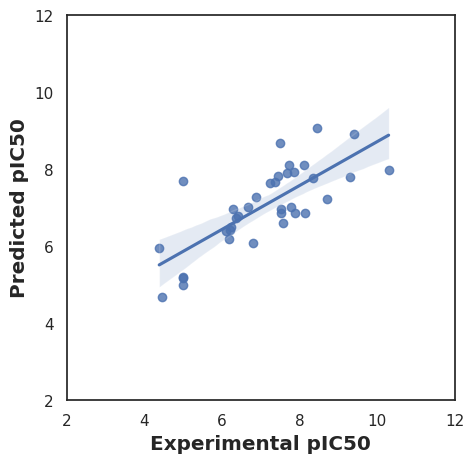

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Assuming Y_test and Y_pred are NumPy arrays or lists containing your data
plt.figure(figsize=(5, 5))
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.8})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 12)
ax.set_ylim(2, 12)
plt.savefig('p1.png', dpi=300)
plt.show()

In [39]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_regressor, f)

Save your data this time manually from the right side of the pannel.